In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, lda, ensemble, random_projection)

/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X = pd.read_csv('/Users/Aditya/Documents/Kaggle/Prudential Life Insurance/train.csv')
X['Product_Info_2'] = LabelEncoder().fit_transform(X['Product_Info_2'])
y = X['Response']
X = X.drop('Response', axis=1)

In [3]:
cat_cols = 'Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41'.split(', ')
cat_cols = [x.strip() for x in cat_cols]

In [4]:
X_cat = X[cat_cols]
X_cat = X_cat.dropna(axis=1, thresh=X_cat.shape[0]//3)
X_cat = X_cat.fillna(X[cat_cols].median(axis=0))
X_cat = OneHotEncoder().fit_transform(X_cat.values, y.values).toarray()
X = X.drop(cat_cols, axis=1)
X = X.dropna(axis=1, thresh=X.shape[0]//3)
X = X.fillna(X.median(axis=0))
X = np.hstack((X.values, X_cat))
y = y.values
rows = np.concatenate((np.ones(5000), np.zeros(X.shape[0] - 5000))).astype(bool)
np.random.shuffle(rows)
X_orig, y_orig = X, y
X, y = X[rows], y[rows]

In [5]:
n_samples, n_features = X.shape
n_neighbors = 30

In [6]:
from matplotlib.axes import Axes
# Scale and visualize the embedding vectors
def plot_embedding(X, y_=None, n_components=3, title=None):
#     x_min, x_max = np.min(X, 0), np.max(X, 0)
#     X = (X - x_min) / (x_max - x_min)

    if title is not None:
        plt.title(title)
    rows = np.concatenate((np.ones(X.shape[0]//5), np.zeros(X.shape[0] - X.shape[0]//5))).astype(bool)
    np.random.shuffle(rows)
    
    y_ = y_ if y_ is not None else y
    X_ = X[rows]
    y_ = y_[rows]
    if n_components == 2:
        plt.scatter(X_[:, 0], X_[:, 1], c=y_)
    else:
        fig = plt.figure()
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=60, azim=145)
        ax.scatter(X_[:, 0], X_[:, 1], X_[:, 2], c=y_)
#     plt.xticks([]), plt.yticks([])
    

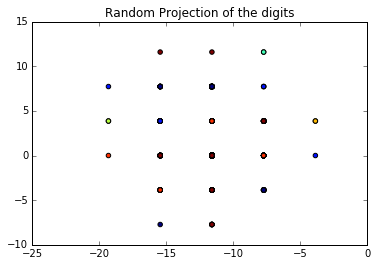

In [41]:
# Random 2D projection using a random unitary matrix
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, n_components=2, title="Random Projection of the digits")

[False  True  True ..., False False False]


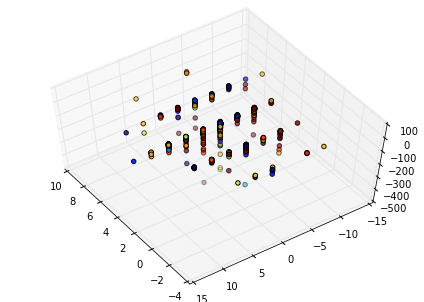

In [8]:
# Random 3D projection using a random unitary matrix
rp = random_projection.SparseRandomProjection(n_components=3, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, title="Random Projection of the digits")

[ True False False ..., False False False]


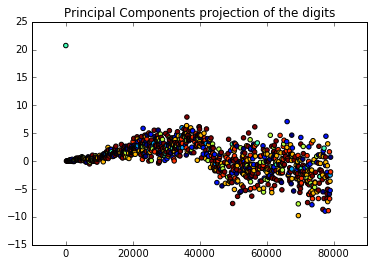

In [9]:
# Projection on to the first 2 principal components
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)

plot_embedding(X_pca, n_components=2, title="Principal Components projection of the digits")

[False  True  True ..., False False False]


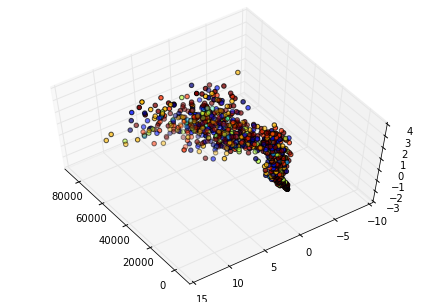

In [10]:
# Projection on to the first 2 principal components
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(X)

plot_embedding(X_pca, title="Principal Components projection of the digits")

[False False False ...,  True False  True]


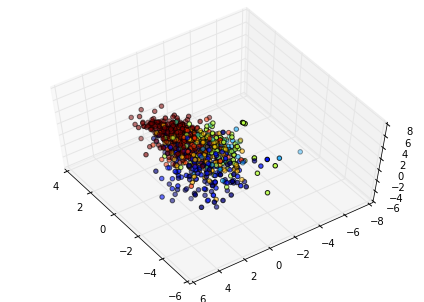

In [11]:
# Projection on to the first 2 linear discriminant components
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
X_lda = lda.LDA(n_components=3).fit_transform(X2, y)

plot_embedding(X_lda, title="Linear Discriminant projection of the digits")

[False False  True ..., False False False]


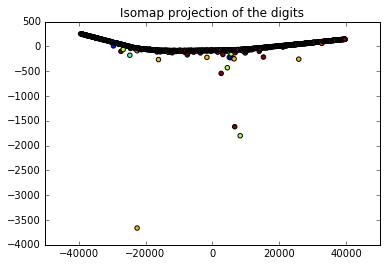

In [12]:
# Isomap projection of the digits dataset
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)

plot_embedding(X_iso, 2, title="Isomap projection of the digits")

[ True  True False ..., False False False]


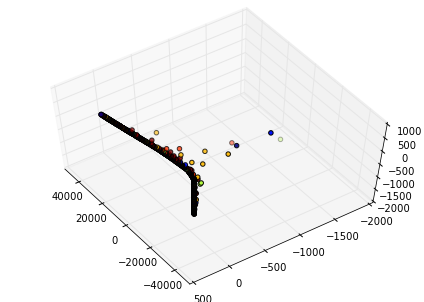

In [13]:
# Isomap projection of the digits dataset
X_iso = manifold.Isomap(n_neighbors, n_components=3).fit_transform(X)

plot_embedding(X_iso, title="Isomap projection of the digits")

Reconstruction error: 9.69165e-09
[False False False ..., False  True False]


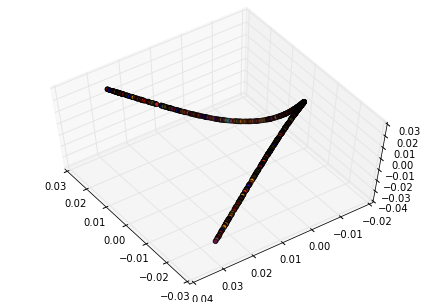

In [14]:
# Locally linear embedding of the digits dataset
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=3, method='standard')
X_lle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)

plot_embedding(X_lle, title="Locally Linear Embedding of the digits (time %.2fs)" %0)

Reconstruction error: 4.56506e-07
[False False False ..., False False False]


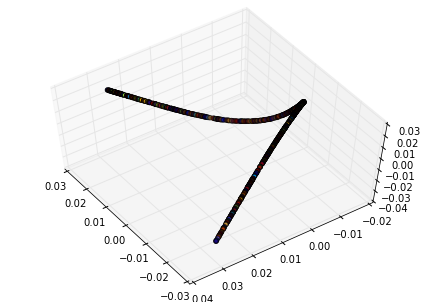

In [15]:
# Modified Locally linear embedding of the digits dataset
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=3, method='modified')
X_mlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)

plot_embedding(X_mlle, title="Modified Locally Linear Embedding of the digits (time %.2fs)" %0)

Reconstruction error: 9.69164e-09
[False False False ..., False False False]


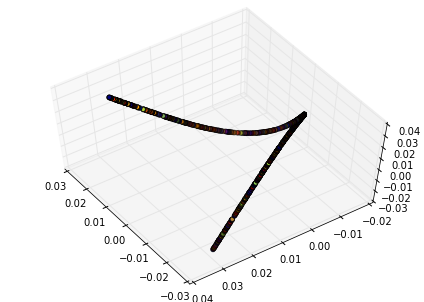

In [16]:
# HLLE embedding of the digits dataset
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=3)
X_hlle = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)

plot_embedding(X_hlle, title="Hessian Locally Linear Embedding of the digits (time %.2fs)" %0)

Reconstruction error: 1.23937e-07
[ True False False ...,  True  True False]


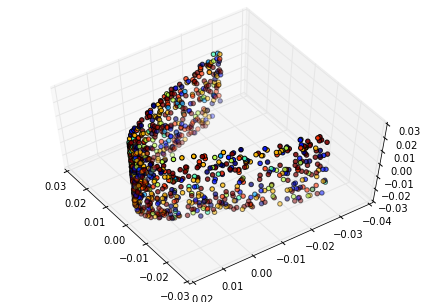

In [17]:
# LTSA embedding of the digits dataset
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=3, method='ltsa')
X_ltsa = clf.fit_transform(X)
print("Reconstruction error: %g" % clf.reconstruction_error_)

plot_embedding(X_ltsa, title="Local Tangent Space Alignment of the digits (time %.2fs)" %0)

Stress: 15993924641.081659
[False False False ..., False False False]


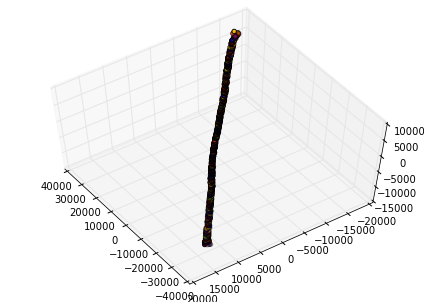

In [18]:
# MDS  embedding of the digits dataset
clf = manifold.MDS(n_components=3, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
print("Stress: %f" % clf.stress_)

plot_embedding(X_mds, title="MDS embedding of the digits (time %.2fs)" %0)

[False  True False ...,  True  True False]


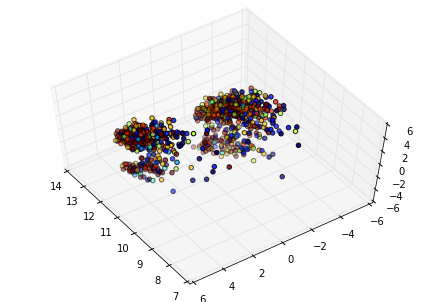

In [19]:
# Random Trees embedding of the digits dataset
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0, max_depth=5)
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=3)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced, title="Random forest embedding of the digits (time %.2fs)" %0)

[False False  True ...,  True False  True]


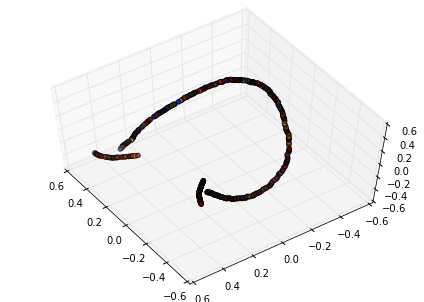

In [20]:
# Spectral embedding of the digits dataset
embedder = manifold.SpectralEmbedding(n_components=3, random_state=0, eigen_solver="arpack")
X_se = embedder.fit_transform(X)

plot_embedding(X_se, title="Spectral embedding of the digits (time %.2fs)" %0)

[False False False ..., False False False]


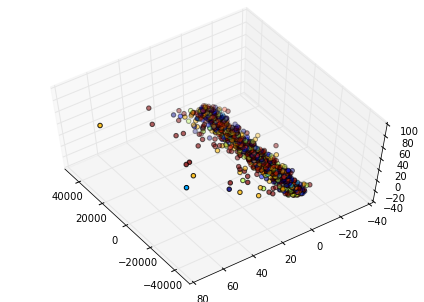

In [21]:
# t-SNE embedding of the digits dataset
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,title="t-SNE embedding of the digits (time %.2fs)" %0)

All the above plots indicate one thing quite clearly. There is an underlying lower dimensional subspace that is generating the data. The data is quite obviously non linear.

Let's reset the data to full size and start classifying it.

In [18]:
X_red, y_red = X, y
X, y = X_orig, y_orig

# Classification

In [14]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [8]:
def evaluate_classifier(clf):
    scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1)
    print("Avg score: {:.5}, Standard Deviation of scores: {:.5}".format(scores.mean(), scores.std()))
    conf_mat = pd.DataFrame(confusion_matrix(y, cross_val_predict(clf, X, y, cv=5, n_jobs=-1)), columns = np.unique(y), index=np.unique(y))
    conf_mat['Accuracy'] = np.diagonal(conf_mat)*100/np.sum(conf_mat.values, axis = 1)
    print(conf_mat)

Let's start simple with linear methods.

First, Linear Discriminant Analysis

In [74]:
from sklearn.lda import LDA

lda = LDA()
evaluate_classifier(lda)

Avg score: 0.4438, Standard Deviation of scores: 0.01167


/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


     1    2   3   4    5    6    7     8   Accuracy
1  154  100   6   7   40   92   44   113  27.697842
2   94  140   7   3   63  105   43   104  25.044723
3    2   13   7   4    9   43    2    18   7.142857
4    6    3   6  14    0   33    9    42  12.389381
5   41   56   8   4  126   83   38    88  28.378378
6   63   98  23  11   34  309  103   263  34.181416
7   36   22   3  10   20  136  149   287  22.473605
8   29   31  10  19   21  162   71  1320  79.374624


/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


44% accuracy. Let's try Naive Bayes Classifier

The data is highly non linear, and not at all Gaussian. A Gaussian NB classifier should work badly.

In [75]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
evaluate_classifier(gnb)

Avg score: 0.3772, Standard Deviation of scores: 0.0098536
    1   2   3  4  5    6    7     8   Accuracy
1  21  24  25  0  4   68   82   332   3.776978
2   7  22  12  6  2   85   88   337   3.935599
3   0   2   4  2  0   10    7    73   4.081633
4   0   1   5  4  0    3    8    92   3.539823
5   4   8   7  4  3   41   49   328   0.675676
6   6  10  10  3  2  141  106   626  15.597345
7   3   1   3  2  0   49  127   478  19.155354
8   0   1   4  3  1   66   24  1564  94.046903


As expected. Choosing the exact opposite of what this classifier predicts would give us a much better classifier!

Multinomial NB classifier

In [76]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
evaluate_classifier(mnb)

Avg score: 0.35805, Standard Deviation of scores: 0.057036
     1    2   3  4   5    6    7     8   Accuracy
1  213   86  21  2   8   52   80    94  38.309353
2  141  124   8  5  15   70   88   108  22.182469
3   17    9   9  3   1   19    9    31   9.183673
4   15    4  13  3   2   19   19    38   2.654867
5   87   43  11  1  35   52   82   133   7.882883
6  153   96  28  5  15  184  171   252  20.353982
7  100   45  16  2  12   81  193   214  29.110106
8   88   38  29  6  15  142  315  1030  61.936260


Even this is really bad. 

Quadratic Discriminant Analysis

In [77]:
from sklearn.qda import QDA

qda = QDA()
evaluate_classifier(qda)

Avg score: 0.19637, Standard Deviation of scores: 0.030221


/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


    1   2   3   4   5    6    7    8   Accuracy
1  31  46  10   2  40  193  114  120   5.575540
2  21  57   5   5  40  228  101  102  10.196780
3   2   7   0   3   5   31   24   26   0.000000
4   6   1   4   2   2   32   33   33   1.769912
5  18  49   3   4  26  137   97  110   5.855856
6  35  62  29  12  39  343  207  177  37.942478
7  22  30  11   7  23  244  155  171  23.378582
8  49  77  36  17  67  587  462  368  22.128683


/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


K-nearest neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier

ks = [100, 500, 800]
for weights in ['uniform', 'distance']:
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        print('{}-nearest neighbors:'.format(k))
        evaluate_classifier(knn)

100-nearest neighbors:
Avg score: 0.22904, Standard Deviation of scores: 0.063752
   1  2  3  4  5    6    7    8   Accuracy
1  1  0  0  0  0  184  102  269   0.179856
2  1  0  0  0  0  146  116  296   0.000000
3  0  0  0  0  0   16   21   61   0.000000
4  0  0  0  0  0   27   25   61   0.000000
5  0  0  0  0  0  133   95  216   0.000000
6  2  0  0  0  0  218  196  488  24.115044
7  0  0  0  0  0  157  140  366  21.116139
8  4  0  0  0  0  523  349  787  47.324113
500-nearest neighbors:
Avg score: 0.3326, Standard Deviation of scores: 0.00057288
   1  2  3  4  5  6  7     8  Accuracy
1  0  0  0  0  0  0  0   556         0
2  0  0  0  0  0  0  0   559         0
3  0  0  0  0  0  0  0    98         0
4  0  0  0  0  0  0  0   113         0
5  0  0  0  0  0  0  0   444         0
6  0  0  0  0  0  0  0   904         0
7  0  0  0  0  0  0  0   663         0
8  0  0  0  0  0  0  0  1663       100
800-nearest neighbors:
Avg score: 0.3326, Standard Deviation of scores: 0.00057288
   1  2  3  4 

Let's use Decision Tree's next

In [80]:
from sklearn.tree import DecisionTreeClassifier

min_leafs = [100, 800, 1300]
criteria = ['gini', 'entropy']
for criterion in criteria:
    for x in min_leafs:
        dtc = DecisionTreeClassifier(criterion=criterion, min_samples_leaf=x)
        print("{}-{}".format(criterion, x))
        evaluate_classifier(dtc)

gini-100
Avg score: 0.45538, Standard Deviation of scores: 0.013829
    1   2  3  4    5    6    7     8   Accuracy
1  59  57  0  0   34  149   85   172  10.611511
2  42  95  0  0   60  150   78   134  16.994633
3   4   7  0  0   17   43    5    22   0.000000
4   7   0  0  0    0   40   11    55   0.000000
5  22  40  0  0  114  135   40    93  25.675676
6  55  24  0  0   45  409  131   240  45.243363
7  51   9  0  0    5  173  184   241  27.752640
8  26   0  0  0    3  141   77  1416  85.147324
gini-800
Avg score: 0.40061, Standard Deviation of scores: 0.0044379
   1  2  3  4  5    6  7     8   Accuracy
1  0  0  0  0  0  282  0   274   0.000000
2  0  0  0  0  0  327  0   232   0.000000
3  0  0  0  0  0   60  0    38   0.000000
4  0  0  0  0  0   35  0    78   0.000000
5  0  0  0  0  0  330  0   114   0.000000
6  0  0  0  0  0  501  0   403  55.420354
7  0  0  0  0  0  286  0   377   0.000000
8  0  0  0  0  0  161  0  1502  90.318701
gini-1300
Avg score: 0.40141, Standard Deviation of s

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

rfc = ExtraTreesClassifier(min_samples_leaf=100, n_jobs=-1)
evaluate_classifier(rfc)

Avg score: 0.43485, Standard Deviation of scores: 0.0050338
     1    2  3  4    5     6     7      8   Accuracy
1  908  583  0  0   44  1799   485   2388  14.628645
2  535  879  0  0   49  1862   534   2693  13.415751
3   39   24  0  0   19   600    19    312   0.000000
4   26    2  0  0    0   675    23    702   0.000000
5  220  259  0  0  148  1455   459   2891   2.724595
6  339  334  0  0    4  4855   811   4890  43.220867
7  168   47  0  0    3  1659  1455   4695  18.126324
8   38   23  0  0    1  1636   214  17577  90.189338


In [21]:
from sklearn.svm import SVC, LinearSVC

C = 1.0  # SVM regularization parameter
# svc = SVC(kernel='linear', C=C).fit(X, y)
# rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X_red, y_red)
# poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X_red, y_red)
lin_svc = LinearSVC(C=C).fit(X_red, y_red)

# for clf in [svc, rbf_svc, poly_svc, lin_svc]:
#     print(clf.kernel)
#     evaluate_classifier(clf)
    
evaluate_classifier(lin_svc)

Avg score: 0.2898, Standard Deviation of scores: 0.082239
     1    2    3    4     5     6    7      8   Accuracy
1  525  576  154  194   609  1695  250   2204   8.458192
2  405  547  136  134   890  1870  239   2331   8.348596
3   33   78   57   48   140   329   32    296   5.626851
4   28   89   82  104   144   459   36    486   7.282913
5  252  295  111  104   862  1495  215   2098  15.868925
6  452  763  296  332  1242  3500  431   4217  31.158195
7  371  410  113  147   947  2044  413   3582   5.145135
8  434  405  150  339  2082  4715  162  11202  57.478578


In [ ]:
from sklearn.svm import SVC

C = 1.0
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X_red, y_red)

evaluate_classifier(rbf_svc)

In [16]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.lda import LDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.qda import QDA
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()
clf4 = MultinomialNB()
clf5 = LDA()
clf6 = QDA()
clf7 = ExtraTreesClassifier(min_samples_leaf=100)
clf8 = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1300)

eclf = VotingClassifier(estimators=[('logreg', clf1), ('rndfor', clf2), ('gnb', clf3), ('mnb', clf4), ('lda', clf5), ('qda', clf6), ('etc', clf7), ('dtc', clf8)], voting='hard')

# for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
#     scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
#     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

evaluate_classifier(eclf)

Avg score: 0.41561, Standard Deviation of scores: 0.0071111


/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Va

    1   2  3  4   5    6   7     8   Accuracy
1  83  45  2  3  10  121  12   242  16.023166
2  56  46  0  4  13  144   6   306   8.000000
3   3   5  0  0   1   24   1    53   0.000000
4   6   0  0  0   0   39   1    74   0.000000
5  27  16  1  2  18  108  12   262   4.035874
6  34  37  1  7   7  272  29   548  29.090909
7  14  10  0  1   2  128  45   431   7.131537
8   2   6  1  1   1   55   8  1614  95.616114


/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Aditya/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Va

Let's implement a one vs rest classifier for this data

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_predict

gnb = DecisionTreeClassifier(min_samples_leaf=100)
y_pred = cross_val_predict(gnb, X, y, cv=5, n_jobs=-1)
labels = np.unique(y)
conf_mat = pd.DataFrame(confusion_matrix(y, y_pred), columns=labels , index=labels)
conf_mat['Accuracy'] = np.diagonal(conf_mat)*100/np.sum(conf_mat.values, axis = 1)
print(conf_mat)     

     1     2  3    4     5     6     7      8   Accuracy
1  774   779  4   71   697  1447   809   1626  12.469792
2  474  1403  3   63   918  1486   700   1505  21.413309
3   37    58  8   40   305   423    38    104   0.789733
4   36     7  0  163     3   643    81    495  11.414566
5  129   508  7    9  2868  1071   300    540  52.798233
6  501   331  1  141   497  5418  1537   2807  48.232885
7  251    38  0   49    37  1693  3153   2806  39.279930
8  132    52  0  108    28  1310   833  17026  87.362102


Let's remove the data corresponding to label 8.

In [43]:
label_8_rows = y_pred==8
X,y = X[~label_8_rows], y[~label_8_rows]
rows = np.concatenate((np.ones(5000), np.zeros(X.shape[0] - 5000))).astype(bool)
np.random.shuffle(rows)
X_, y_ = X[rows], y[rows]

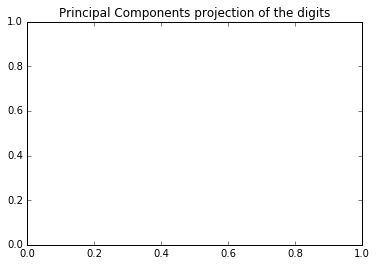

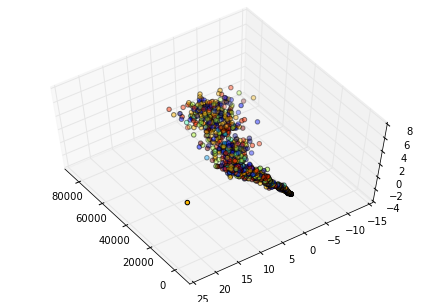

In [44]:
# Projection on to the first 2 principal components
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(X_)

plot_embedding(X_pca, y_, title="Principal Components projection of the digits")

Reconstruction error: 2.12977e-07


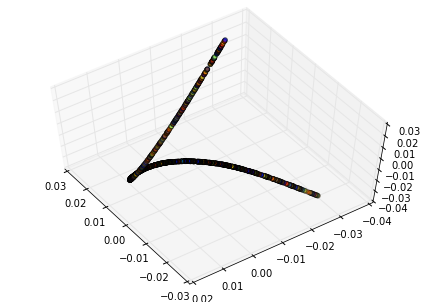

In [45]:
# LTSA embedding of the digits dataset
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=3, method='ltsa')
X_ltsa = clf.fit_transform(X_)
print("Reconstruction error: %g" % clf.reconstruction_error_)

plot_embedding(X_ltsa, y_, "Local Tangent Space Alignment of the digits")

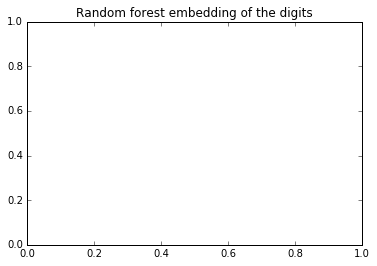

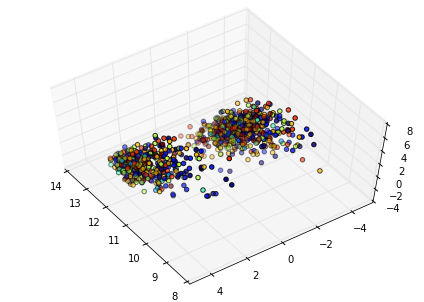

In [46]:
# Random Trees embedding of the digits dataset
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0, max_depth=5)
X_transformed = hasher.fit_transform(X_)
pca = decomposition.TruncatedSVD(n_components=3)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced, y_, title="Random forest embedding of the digits")

In [47]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
evaluate_classifier(gnb)

Avg score: 0.25314, Standard Deviation of scores: 0.0098033
     1    2    3     4     5     6     7    8   Accuracy
1  294  151  132   539   647  1539  1229   50   6.417813
2  119  192   84   571   713  1936  1372   60   3.804240
3    6    5   34   388    46   313    96   21   3.740374
4    1    0   20   457    20   333    81   21  48.981779
5   41   44   62   524  1227  1520  1343  131  25.081766
6   62   66   77  1643   793  3460  2087  238  41.063375
7   25    9   36   386   649  1505  2425  186  46.447041
8    3    3   29   513   287   976   521  131   5.318717


In [ ]:
from sklearn.svm import SVC

C = 1.0  # SVM regularization parameter
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)
evaluate_classifier(poly_svc)